# LOADING IN THE DATA

In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

weather = pd.read_csv(r"C:\Users\anton\Downloads\temperature_data.csv", index_col = 'DATE')

In [2]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,57.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.29,NaN,1850.0,0.25,0.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,16.33,NaN,1249.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CLEANING AND PREPARING THE DATA FOR THE ML MODEL

In [3]:
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0] # Identificação do percentual de valores nulos em cada coluna

In [4]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.522331
ACSH       0.522281
AWND       0.255651
FMTM       0.497044
PGTM       0.386904
PRCP       0.000000
SNOW       0.000000
SNWD       0.000149
TAVG       0.651945
TMAX       0.000000
TMIN       0.000000
TSUN       0.998460
WDF1       0.522530
WDF2       0.479308
WDF5       0.483432
WDFG       0.745591
WDFM       0.999950
WESD       0.698395
WSF1       0.522381
WSF2       0.479308
WSF5       0.483482
WSFG       0.629241
WSFM       0.999950
WT01       0.632520
WT02       0.935118
WT03       0.933131
WT04       0.982811
WT05       0.981917
WT06       0.990958
WT07       0.994635
WT08       0.803418
WT09       0.993045
WT11       0.999304
WT13       0.891450
WT14       0.955934
WT15       0.997913
WT16       0.673257
WT17       0.997019
WT18       0.942024
WT19       0.999950
WT21       0.999752
WT22       0.997566
WV01       0.999950
dtype: float64

In [5]:
valid_col = weather.columns[null_pct < .05] # Extração das colunas com menos de 5% de valores faltantes

In [6]:
valid_col

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [7]:
weather = weather[valid_col].copy()

In [8]:
weather.columns = weather.columns.str.lower()

In [9]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,29
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.25,0.2,0.0,42,33
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,31


In [10]:
weather = weather.ffill() # Preenche os valores nulos restantes, ainda que poucos

In [11]:
weather.apply(pd.isnull).sum() # Contagem de valores nulos nas colunas 

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [12]:
weather.dtypes # Verificação dos tipos das variáveis, para possíveis conversões ou constatações

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [13]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03', '2025-02-04',
       '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-08', '2025-02-09'],
      dtype='object', name='DATE', length=20129)

In [14]:
weather.index = pd.to_datetime(weather.index) # Convertendo o index (DATE) para tipo numérico (facilitará algumas operações)

In [15]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03',
               '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07',
               '2025-02-08', '2025-02-09'],
              dtype='datetime64[ns]', name='DATE', length=20129, freq=None)

In [16]:
weather.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=20129)

In [17]:
weather.index.year.value_counts().sort_index() # Verificar se o número de dias está correto

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025     40
Name: count, dtype: int64

<Axes: xlabel='DATE'>

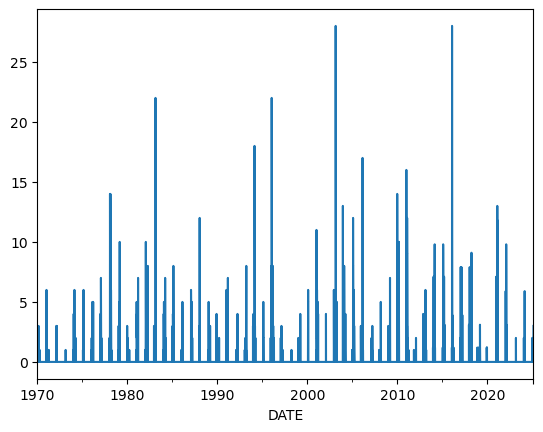

In [18]:
weather['snwd'].plot()

In [19]:
weather['target'] = weather.shift(-1)['tmax'] # Criação da variável alvo e preenchimento com os valores dos dias seguintes

In [20]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,29,42.0
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.25,0.2,0.0,42,33,48.0
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,31,37.0


In [21]:
# Na tabela acima, há um problema: a última linha não apresentará dados da target feature, já que não há data posterior
# Dessa forma, para facilitar, pode ser usado ffill() novamente
weather = weather.ffill()

In [22]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,29,42.0
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.25,0.2,0.0,42,33,48.0
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,31,37.0


# TRAIN A ML MODEL

In [23]:
weather.corr(numeric_only = True) # Definição da correlação entre variáveis
# O parâmetro 'numeric_only = True' é usado para encontrar a correlação apenas entre valores numéricos

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.146953,0.001056,-0.008156,0.051421,-0.004264
snow,0.146953,1.000000,0.234168,-0.173723,-0.157967,-0.171611
snwd,0.001056,0.234168,1.000000,-0.256716,-0.253694,-0.238234
tmax,-0.008156,-0.173723,-0.256716,1.000000,0.955250,0.915382
tmin,0.051421,-0.157967,-0.253694,0.955250,1.000000,0.915094
target,-0.004264,-0.171611,-0.238234,0.915382,0.915094,1.000000


In [24]:
rr_model = Ridge(alpha = 0.1) # Criação do modelo de regressão

In [25]:
predictors = weather.columns[~weather.columns.isin(['target', 'name', 'station'])]
# Na variável acima, selecionamos todas as colunas com exceção de 'target', 'name', 'station' através do uso de '~'

In [26]:
def backtesting(weather, model, predcitors, start = 3650, step = 90): # Função para criação de conjunto de treino e validação (Time Series)
    all_predictions = []

    for i in range (start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train['target'])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index = test.index)

        combined = pd.concat([test['target'], preds], axis = 1)

        combined.columns = ['actual', 'prediction']

        combined['diff'] = (combined['prediction'] - combined['actual']).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions, axis = 0)

# MAKING PREDICTIONS

In [27]:
predictions = backtesting(weather, rr_model, predictors)

In [28]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2025-02-05,42.0,43.525424,1.525424
2025-02-06,48.0,45.185378,2.814622
2025-02-07,37.0,47.266271,10.266271


In [29]:
mae = mean_absolute_error(predictions['actual'], predictions['prediction']) 
# Cálculo do Erro Médio Absoluto (MAE)

In [30]:
mae 

5.131859062706471

# IMPROVING THE ACCURACY 

In [32]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f'rolling_{horizon}_{col}'

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f'{label}_pct'] = pct_diff(weather[label], weather[col])

    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ['tmax', 'tmin', 'prcp']:
        weather = compute_rolling(weather, horizon, col)

In [34]:
# Acima, são adicionadas funções para criar colunas com médias móveis de determinados períodos de tempo, evitando o desvio causado por analisar cada valor individualmente

In [33]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,29,42.0,46.000000,-0.086957,31.333333,-0.074468,0.000000,NaN,42.928571,-0.021631,27.000000,0.074074,0.017857,-1.000000
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.25,0.2,0.0,42,33,48.0,44.666667,-0.059701,31.666667,0.042105,0.083333,2.000000,43.785714,-0.040783,28.214286,0.169620,0.035714,6.000000
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,31,37.0,44.000000,0.090909,31.000000,0.000000,0.083333,-1.000000,44.714286,0.073482,29.000000,0.068966,0.035714,-1.000000


In [37]:
weather = weather.iloc[14:,:] # Exclusão de valores NaN por impossibilidade de cálculo (não há dados anteriores suficientes para calcular média de 14 dias no passado)

In [36]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,NaN,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,NaN,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.000000,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.500000,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.000000,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,29,42.0,46.000000,-0.086957,31.333333,-0.074468,0.000000,NaN,42.928571,-0.021631,27.000000,0.074074,0.017857,-1.000000
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.25,0.2,0.0,42,33,48.0,44.666667,-0.059701,31.666667,0.042105,0.083333,2.000000,43.785714,-0.040783,28.214286,0.169620,0.035714,6.000000
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,31,37.0,44.000000,0.090909,31.000000,0.000000,0.083333,-1.000000,44.714286,0.073482,29.000000,0.068966,0.035714,-1.000000


In [39]:
weather = weather.fillna(0) # Substitui valores NaN restantes (percentuais) por zero

In [40]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ['tmax', 'tmin', 'prcp']:
    weather[f'month_avg_{col}'] = weather[col].groupby(weather.index.month, group_keys = False).apply(expand_mean)
    weather[f'day_avg_{col}'] = weather[col].groupby(weather.index.day_of_year, group_keys = False).apply(expand_mean)

In [41]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,40,47.0,41.666667,0.176000,...,22.285714,0.794872,0.017143,-1.000000,49.000000,49.000000,40.000000,40.000000,0.000000,0.000000
1970-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,24,36.0,45.333333,0.036765,...,22.500000,0.066667,0.017143,-1.000000,48.000000,47.000000,32.000000,24.000000,0.000000,0.000000
1970-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,22,48.0,44.000000,-0.181818,...,21.928571,0.003257,0.015714,-1.000000,44.000000,36.000000,28.666667,22.000000,0.000000,0.000000
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,34,49.0,43.666667,0.099237,...,22.571429,0.506329,0.008571,-1.000000,48.000000,48.000000,34.000000,34.000000,0.000000,0.000000
1970-02-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,49,36,50.0,44.333333,0.105263,...,24.000000,0.500000,0.016429,5.695652,48.500000,49.000000,35.000000,36.000000,0.055000,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,29,42.0,46.000000,-0.086957,...,27.000000,0.074074,0.017857,-1.000000,41.507377,38.125000,27.849262,24.910714,0.099403,0.122321
2025-02-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.25,0.2,0.0,42,33,48.0,44.666667,-0.059701,...,28.214286,0.169620,0.035714,6.000000,41.507692,38.642857,27.852564,25.803571,0.099500,0.100536
2025-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,31,37.0,44.000000,0.090909,...,29.000000,0.068966,0.035714,-1.000000,41.511851,39.107143,27.854580,26.446429,0.099436,0.100714


In [42]:
predictors = weather.columns[~weather.columns.isin(['target', 'name', 'station'])]

In [43]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [44]:
predictions = backtesting(weather, rr_model, predictors)

In [45]:
mae = mean_absolute_error(predictions['actual'], predictions['prediction'])

In [46]:
mae

4.781485972448196